In [33]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

import weightedcalcs as wc


In [29]:
hh = pd.read_csv("household_data.csv")

In [30]:
hh

,income,weights,homeshare
0,0.283021,0.009584,0.998816
1,0.283021,0.007384,0.996984
2,0.283021,0.004162,0.995239
3,0.283021,0.001733,0.994224
4,0.283021,0.001195,0.992914
...,...,...,...
995,2.737243,0.000383,0.835032
996,2.737243,0.000501,0.831131
997,2.737243,0.000168,0.826802
998,2.737243,0.000178,0.822134


In [34]:
calc = wc.Calculator("weights")

1.7400107444879225

In [49]:
foo = hh[hh.income > calc.quantile(hh, "income", 0.10)]

In [50]:
calc.median(foo,"homeshare")

0.952379182544193

(-1.5, 1.5)

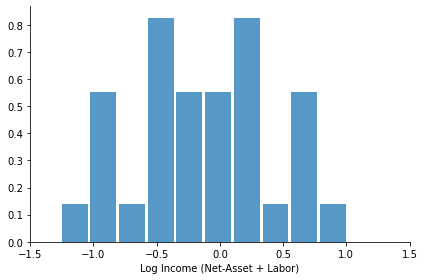

In [32]:
fig, ax = plt.subplots(tight_layout = True)

ax.hist(np.log(hh.income), weights = hh.weights, 
        density = True, bins = 10, rwidth = 0.90, alpha = 0.75);

ax.set_xlabel("Log Income (Net-Asset + Labor)")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlim(-1.5,1.5)